In [ ]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Read dataset
data = pd.read_csv('wine-class.csv')

In [ ]:
# Check the size
data.shape

(178, 14)

In [ ]:
data.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.min()

class                              1.00
alcohol                           11.03
 malic_acid                        0.74
 ash                               1.36
 alcalinity_of_ash                10.60
 magnesium                        70.00
 total_phenols                     0.98
 flavanoids                        0.34
 nonflavanoid_phenols              0.13
 proanthocyanins                   0.41
 color_intensity                   1.28
 hue                               0.48
 od280/od315_of_diluted_wines      1.27
 proline                         278.00
dtype: float64

In [ ]:
data.max()

class                               3.00
alcohol                            14.83
 malic_acid                         5.80
 ash                                3.23
 alcalinity_of_ash                 30.00
 magnesium                        162.00
 total_phenols                      3.88
 flavanoids                         5.08
 nonflavanoid_phenols               0.66
 proanthocyanins                    3.58
 color_intensity                   13.00
 hue                                1.71
 od280/od315_of_diluted_wines       4.00
 proline                         1680.00
dtype: float64

In [ ]:
# Check missing values
data.isnull().sum()

class                            0
alcohol                          0
 malic_acid                      0
 ash                             0
 alcalinity_of_ash               0
 magnesium                       3
 total_phenols                   0
 flavanoids                      0
 nonflavanoid_phenols            0
 proanthocyanins                 0
 color_intensity                 0
 hue                             2
 od280/od315_of_diluted_wines    7
 proline                         0
dtype: int64

In [ ]:
# Clean data
data[' magnesium'] = data.replace(np.NaN, data[' magnesium'].median())
data[' hue'] = data.replace(np.NaN, data[' hue'].median())
data[' od280/od315_of_diluted_wines'] = data.replace(np.NaN, 
                                                     data[' od280/od315_of_diluted_wines'].median())

In [ ]:
data.isnull().sum()

class                            0
alcohol                          0
 malic_acid                      0
 ash                             0
 alcalinity_of_ash               0
 magnesium                       0
 total_phenols                   0
 flavanoids                      0
 nonflavanoid_phenols            0
 proanthocyanins                 0
 color_intensity                 0
 hue                             0
 od280/od315_of_diluted_wines    0
 proline                         0
dtype: int64

In [ ]:
# Input features
X = data.drop('class', axis=1)

In [ ]:
# Output
y = data['class']

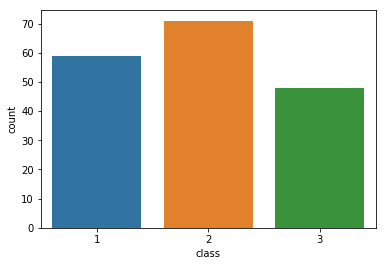

In [ ]:
# Count classes
sns.countplot(y)

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,1.0,2.80,3.06,0.28,2.29,5.64,1.0,1.0,1065
1,13.20,1.78,2.14,11.2,1.0,2.65,2.76,0.26,1.28,4.38,1.0,1.0,1050
2,13.16,2.36,2.67,18.6,1.0,2.80,3.24,0.30,2.81,5.68,1.0,1.0,1185
3,14.37,1.95,2.50,16.8,1.0,3.85,3.49,0.24,2.18,7.80,1.0,1.0,1480
4,13.24,2.59,2.87,21.0,1.0,2.80,2.69,0.39,1.82,4.32,1.0,1.0,735


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                          178 non-null float64
 malic_acid                      178 non-null float64
 ash                             178 non-null float64
 alcalinity_of_ash               178 non-null float64
 magnesium                       178 non-null float64
 total_phenols                   178 non-null float64
 flavanoids                      178 non-null float64
 nonflavanoid_phenols            178 non-null float64
 proanthocyanins                 178 non-null float64
 color_intensity                 178 non-null float64
 hue                             178 non-null float64
 od280/od315_of_diluted_wines    178 non-null float64
 proline                         178 non-null int64
dtypes: float64(12), int64(1)
memory usage: 18.2 KB


In [ ]:
# Transpose
Xt = X.T

In [ ]:
# Find duplicated values
print(Xt.duplicated().sum())

2


In [ ]:
unique_features = Xt.drop_duplicates(keep='first').T

In [ ]:
unique_features.shape
X = unique_features

In [ ]:
X.shape

(178, 11)

In [ ]:
correlated_features = set()
correlation_matrix = data.corr(method='spearman') # use pearson correlation

In [ ]:
correlation_matrix

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
class,1.000000,-0.354167,0.346913,-0.053988,0.569792,1.000000,-0.726544,-0.854908,0.474205,-0.570648,0.131170,1.000000,1.000000,-0.576383
alcohol,-0.354167,1.000000,0.140430,0.243722,-0.306598,-0.354167,0.310920,0.294740,-0.162207,0.192734,0.635425,-0.354167,-0.354167,0.633580
malic_acid,0.346913,0.140430,1.000000,0.230674,0.304069,0.346913,-0.280225,-0.325202,0.255236,-0.244825,0.290307,0.346913,0.346913,-0.057466
ash,-0.053988,0.243722,0.230674,1.000000,0.366374,-0.053988,0.132193,0.078796,0.145583,0.024384,0.283047,-0.053988,-0.053988,0.253163
alcalinity_of_ash,0.569792,-0.306598,0.304069,0.366374,1.000000,0.569792,-0.376657,-0.443770,0.389390,-0.253695,-0.073776,0.569792,0.569792,-0.456090
magnesium,1.000000,-0.354167,0.346913,-0.053988,0.569792,1.000000,-0.726544,-0.854908,0.474205,-0.570648,0.131170,1.000000,1.000000,-0.576383
total_phenols,-0.726544,0.310920,-0.280225,0.132193,-0.376657,-0.726544,1.000000,0.879404,-0.448013,0.666689,0.011162,-0.726544,-0.726544,0.419470
flavanoids,-0.854908,0.294740,-0.325202,0.078796,-0.443770,-0.854908,0.879404,1.000000,-0.543897,0.730322,-0.042910,-0.854908,-0.854908,0.429904
nonflavanoid_phenols,0.474205,-0.162207,0.255236,0.145583,0.389390,0.474205,-0.448013,-0.543897,1.000000,-0.384629,0.059639,0.474205,0.474205,-0.270112
proanthocyanins,-0.570648,0.192734,-0.244825,0.024384,-0.253695,-0.570648,0.666689,0.730322,-0.384629,1.000000,-0.030947,-0.570648,-0.570648,0.308249


In [ ]:
# Remove uncorrelated features
X.drop(' ash', axis=1, inplace=True)

In [ ]:
X.shape

(178, 10)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, y)

In [ ]:
features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[[1.560e+01 1.000e+00 3.060e+00 5.640e+00 1.065e+03]
 [1.120e+01 1.000e+00 2.760e+00 4.380e+00 1.050e+03]
 [1.860e+01 1.000e+00 3.240e+00 5.680e+00 1.185e+03]
 [1.680e+01 1.000e+00 3.490e+00 7.800e+00 1.480e+03]
 [2.100e+01 1.000e+00 2.690e+00 4.320e+00 7.350e+02]]


In [ ]:

cols = [' alcalinity_of_ash',' magnesium',' flavanoids',
        ' color_intensity',' proline' ]

In [ ]:
X = X[cols]

In [ ]:
X.head()

,alcalinity_of_ash,magnesium,flavanoids,color_intensity,proline
0,15.6,1.0,3.06,5.64,1065.0
1,11.2,1.0,2.76,4.38,1050.0
2,18.6,1.0,3.24,5.68,1185.0
3,16.8,1.0,3.49,7.80,1480.0
4,21.0,1.0,2.69,4.32,735.0


In [ ]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(n_estimators=100, random_state=0)
isf = isf.fit(X)
clean = isf.predict(X)

In [ ]:
X = X[clean==1]
y = y[clean==1]

In [ ]:
X.shape

(143, 5)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE 

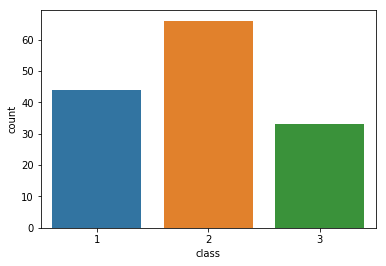

In [ ]:
sns.countplot(y)

In [ ]:
rus = RandomOverSampler(random_state = 0) 
X_res, y_res = rus.fit_resample(X, y) 
   
X_res = pd.DataFrame(X_res) 
Y_res = pd.DataFrame(y_res) 

In [ ]:
X_res.shape

(198, 5)

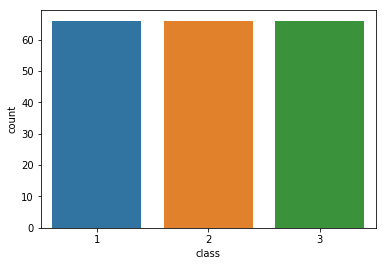

In [ ]:
sns.countplot(y_res)

In [ ]:
X.head()

,alcalinity_of_ash,magnesium,flavanoids,color_intensity,proline
0,15.6,1.0,3.06,5.64,1065.0
2,18.6,1.0,3.24,5.68,1185.0
4,21.0,1.0,2.69,4.32,735.0
6,14.6,1.0,2.52,5.25,1290.0
7,17.6,1.0,2.51,5.05,1295.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_s = scaler.fit_transform(X_res)

In [ ]:
# Cross validation
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_s, y_res, random_state = 0)

In [ ]:
X_train.shape

(148, 5)

In [ ]:
X_test.shape

(50, 5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#classifier = GaussianNB() # Normal
classifier = KNeighborsClassifier(n_neighbors=5)

In [ ]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([1, 3, 2, 3, 2, 2, 1, 3, 1, 1, 2, 2, 1, 2, 3, 1, 1, 3, 1, 3, 2, 1,
       2, 1, 3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 1, 3, 3, 1, 2, 3, 3, 3, 1, 2,
       1, 2, 1, 3, 2, 3])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 19]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        19

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred) * 100

100.0

In [ ]:
outputfile = 'wine.model'
from sklearn.externals import joblib  
joblib.dump(classifier, outputfile, compress=9) 

['wine.model']

In [ ]:
outputfile = 'scaler.model'
from sklearn.externals import joblib  
joblib.dump(scaler, outputfile, compress=9) 

['scaler.model']

In [ ]:
new = [[18.50,3.0,0.7,5.28,675]]
new = scaler.transform(new)

In [ ]:
classifier.predict(new)

array([3])

In [ ]:
data.iloc[132,:]

class                              3.00
alcohol                           12.81
 malic_acid                        2.31
 ash                               2.40
 alcalinity_of_ash                24.00
 magnesium                         3.00
 total_phenols                     1.15
 flavanoids                        1.09
 nonflavanoid_phenols              0.27
 proanthocyanins                   0.83
 color_intensity                   5.70
 hue                               3.00
 od280/od315_of_diluted_wines      3.00
 proline                         560.00
Name: 132, dtype: float64

In [ ]:
y_train[67]